#  <p style="padding:10px;background-color:#232323;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">CUSTOMER_SEGMENTATION_PROJECT</p>


Required libraries.

In [1]:
import pandas as pd

Data importation

In [2]:
Data=pd.read_csv('Mall_Customers.csv')

Questions
1.Display top Five rows of the dataset.


In [3]:
Data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


2.Display last five rows of the dataset.

In [4]:
Data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


3.Find shape of the dataset(Number of rows and number of columns)

In [5]:
Data.shape

(200, 5)

4.Get information about our dataset Like total Number of Rows Total Number of columns, Datatypes of each type and memory allocation.

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


5.Check Null Values in The dataset

In [7]:
Data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

6.Get overall statistics About the data.

In [8]:
Data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


7.K-Means clustering

To display columns in our dataframe

In [9]:
#To display columns in our dataframe
Data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

We are using only two of them and then call to see how it looks

In [10]:
X = Data[['Annual Income (k$)','Spending Score (1-100)']]
X


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Import Required tools for K-Mean clustering

In [11]:
from sklearn.cluster import KMeans

In [12]:
k_means=KMeans()

In [13]:
#fit()-> only trains our algorithm
k_means.fit(X)

KMeans()

In [14]:
#fit_predict->trains and predict dependent variable which is the cluster
#By default There Are 8 clusters which are predicted
k_means.fit_predict(X)

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 7, 1, 7, 1, 1, 7, 7, 1, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 2, 0, 2, 7, 2, 0, 2, 0, 2,
       7, 2, 0, 2, 0, 2, 0, 2, 0, 2, 7, 2, 0, 2, 7, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 7, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5,
       6, 5])

8.Elbow Method to find optimal number of Clusters.

* Optimal number of clusters are at  the elbow of the plot

* WCSS->Within cluster sum of squares. It is stored in a list


In [15]:
wcss=[]
for i in range(1,11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(X)
    wcss.append(k_means.inertia_)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [16]:
wcss

[269981.28000000014,
 181665.82312925166,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30241.34361793659,
 25011.920255473764,
 21850.16528258562,
 19724.413115962045]

In [17]:
#Visualizing the values
#We use the mathplot library
import matplotlib.pyplot as plt


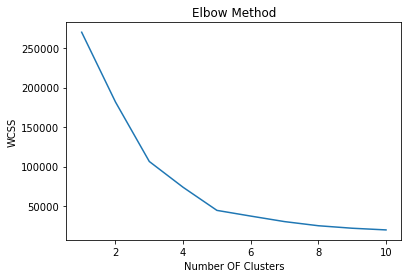

In [18]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number OF Clusters')
plt.ylabel('WCSS')
plt.show()


9.Training the model

     Optimal number of clusters are 5


In [19]:
X = Data[['Annual Income (k$)','Spending Score (1-100)']]
k_means=KMeans(n_clusters=5,random_state=42)
y_means=k_means.fit_predict(X)
y_means


array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

#### Visualizing the plot of clusters

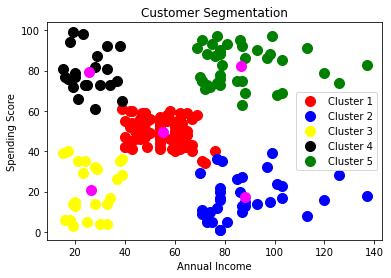

In [20]:
plt.scatter(X.iloc[y_means==0,0],X.iloc[y_means==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X.iloc[y_means==1,0],X.iloc[y_means==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(X.iloc[y_means==2,0],X.iloc[y_means==2,1],s=100,c='yellow',label='Cluster 3')
plt.scatter(X.iloc[y_means==3,0],X.iloc[y_means==3,1],s=100,c='black',label='Cluster 4')
plt.scatter(X.iloc[y_means==4,0],X.iloc[y_means==4,1],s=100,c='green',label='Cluster 5')
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1],s=100,c='magenta')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()


In [21]:
#Predicting
k_means.predict([[15,39]])


array([2])

In [22]:
#Saving The Model
import joblib


In [23]:
joblib.dump(k_means,'Customer_Segmentation')

['Customer_Segmentation']

In [24]:
model=joblib.load('Customer_Segmentation')

In [25]:
model.predict([[15,39]])

array([2])